<a href="https://colab.research.google.com/github/Derek5417/CyberExp2021/blob/main/stable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loading Stable Diffusion 2.0 model from Google Drive...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

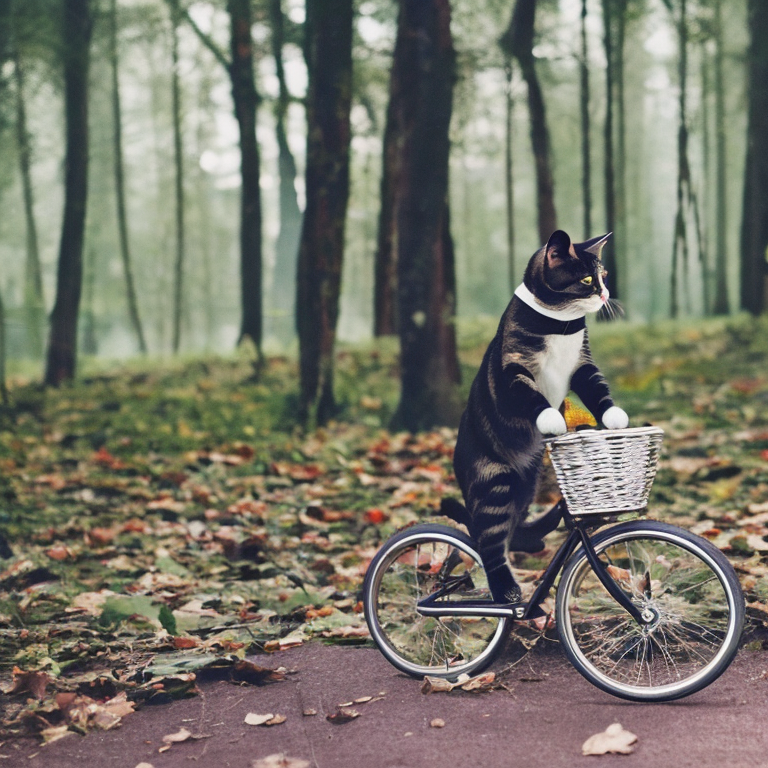

  0%|          | 0/50 [00:00<?, ?it/s]

生成时间: 63.11 秒


In [7]:
from diffusers import StableDiffusionPipeline
import torch
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 使用 GPU 进行推理
device = "cuda" if torch.cuda.is_available() else "cpu"

# 加载 Stable Diffusion 2.0 模型
model_path = "/content/drive/My Drive/stable-diffusion-2"
import os
if not os.path.exists(model_path):
    print("Downloading Stable Diffusion 2.0 model...")
    pipeline = StableDiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-2")
    pipeline.save_pretrained(model_path)
else:
    print("Loading Stable Diffusion 2.0 model from Google Drive...")
    pipeline = StableDiffusionPipeline.from_pretrained(model_path)

# 将模型移动到 GPU
pipeline = pipeline.to(device)

# 设置提示词并生成图像
prompt = "a cat riding a bicycle in a forest"
negative_prompt = ""
with torch.no_grad():
    image = pipeline(prompt, negative_prompt=negative_prompt).images[0]

# 显示图像
image.show()
image.save("/content/drive/My Drive/sd2_output.png")

# 如果在Colab中，可以使用以下代码显示图像：
from IPython.display import display
display(image)

import time

start_time = time.time()
with torch.no_grad():
    image = pipeline(prompt).images[0]
print(f"生成时间: {time.time() - start_time:.2f} 秒")

In [10]:
from diffusers import StableDiffusionPipeline
import torch
import time
from google.colab import drive

# 挂载 Google Drive
drive.mount('/content/drive')

# 使用 GPU 进行推理
device = "cuda" if torch.cuda.is_available() else "cpu"

# 定义模型名称和路径
models = {
    "stable-diffusion-1.4": "CompVis/stable-diffusion-v1-4",
    "stable-diffusion-2.0": "stabilityai/stable-diffusion-2",
}

# 定义提示词（保持一致）
prompt = "an astronaut"

# 定义运行次数
num_runs = 5  # 每个模型运行 5 次

# 记录运行时间
results = {}

# 测试每个模型
for model_name, model_id in models.items():
    print(f"Testing {model_name}...")

    # 加载模型
    model_path = f"/content/drive/My Drive/{model_name}"
    if not os.path.exists(model_path):
        print(f"Downloading {model_name} model...")
        pipeline = StableDiffusionPipeline.from_pretrained(model_id)
        pipeline.save_pretrained(model_path)
    else:
        print(f"Loading {model_name} model from Google Drive...")
        pipeline = StableDiffusionPipeline.from_pretrained(model_path)

    # 将模型移动到 GPU
    pipeline = pipeline.to(device)

    # 记录每次运行的时间
    run_times = []
    for i in range(num_runs):
        print(f"Run {i + 1}/{num_runs}...")
        start_time = time.time()
        with torch.no_grad():
            image = pipeline(prompt).images[0]
        run_time = time.time() - start_time
        run_times.append(run_time)
        print(f"Run {i + 1} time: {run_time:.2f} seconds")

    # 计算平均运行时间
    avg_time = sum(run_times) / num_runs
    results[model_name] = avg_time
    print(f"{model_name} average time: {avg_time:.2f} seconds\n")

# 输出对比结果
print("=== Results ===")
for model_name, avg_time in results.items():
    print(f"{model_name}: {avg_time:.2f} seconds")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Testing stable-diffusion-1.4...
Loading stable-diffusion-1.4 model from Google Drive...


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Run 1/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 1 time: 23.58 seconds
Run 2/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 2 time: 24.10 seconds
Run 3/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 3 time: 24.42 seconds
Run 4/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 4 time: 24.02 seconds
Run 5/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 5 time: 24.04 seconds
stable-diffusion-1.4 average time: 24.03 seconds

Testing stable-diffusion-2.0...
Loading stable-diffusion-2.0 model from Google Drive...


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Run 1/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 1 time: 63.32 seconds
Run 2/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 2 time: 62.83 seconds
Run 3/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 3 time: 62.73 seconds
Run 4/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 4 time: 62.94 seconds
Run 5/5...


  0%|          | 0/50 [00:00<?, ?it/s]

Run 5 time: 62.85 seconds
stable-diffusion-2.0 average time: 62.94 seconds

=== Results ===
stable-diffusion-1.4: 24.03 seconds
stable-diffusion-2.0: 62.94 seconds
